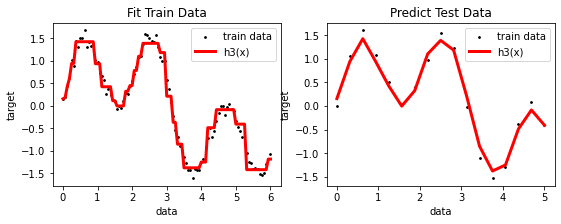

Score on Train:  0.9800556603398347
Score on Test:   0.9778915719406492


In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
# 创建数据集
rs = np.random.RandomState(1)
X_train = np.linspace(0, 6, 97)[:, np.newaxis]
Y_train = np.sin(X_train).ravel() + np.sin(3 * X_train).ravel() + rs.randn(X_train.shape[0]) * 0.1
X_test = np.linspace(0, 5, 17)[:, np.newaxis]
Y_test = np.sin(X_test).ravel() + np.sin(3 * X_test).ravel() + rs.randn(X_test.shape[0]) * 0.1

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=4, learning_rate=1)
gbrt.fit(X_train, Y_train)
# 训练并预测
y_pred = gbrt.predict(X_train)
y_pred_test = gbrt.predict(X_test)
# 可视化训练集拟合
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("Fit Train Data")
plt.scatter(X_train, Y_train, c="k", s=3, label="train data")
plt.plot(X_train, y_pred, c="r", label="h3(x)", linewidth=3)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
# 可视化测试集预测
plt.subplot(1, 2, 2)
plt.title("Predict Test Data")
plt.scatter(X_test, Y_test, c="k", s=3, label="train data")
plt.plot(X_test, y_pred_test, c="r", label="h3(x)", linewidth=3)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.show()
# 查看算法评分
print("Score on Train: ", gbrt.score(X_train, Y_train))
print("Score on Test:  ", gbrt.score(X_test, Y_test))


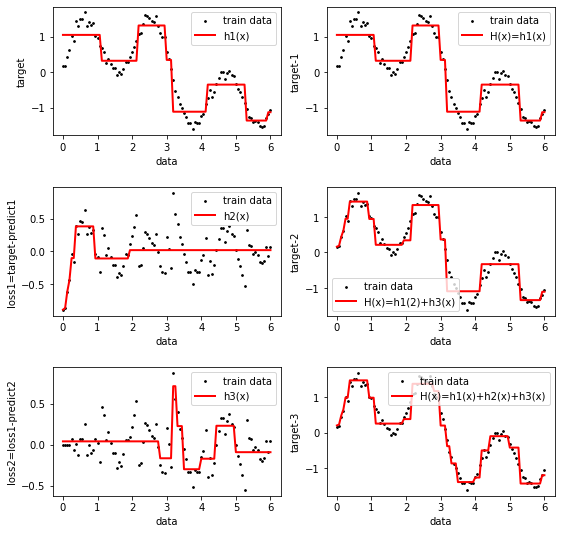

In [2]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_depth=3)
tree2 = DecisionTreeRegressor(max_depth=3)
tree3 = DecisionTreeRegressor(max_depth=3)
## S1：第1个弱学习器拟合原数据
y1 = Y_train
tree1.fit(X_train, y1)
y_pred1 = tree1.predict(X_train)

plt.figure(num=1, figsize=(9, 9))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
# 绘制第1个弱学习器的拟合图像
plt.subplot(3, 2, 1)
plt.scatter(X_train, y1, c="k", s=3, label="train data")
plt.plot(X_train, y_pred1, c="r", label="h1(x)", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
# 绘制第1个弱学习器集成出的强学习器对原数据的拟合图像
plt.subplot(3, 2, 2)
plt.scatter(X_train, Y_train, c="k", s=3, label="train data")
plt.plot(X_train, y_pred1, c="r", label="H(x)=h1(x)", linewidth=2)
plt.xlabel("data")
plt.ylabel("target-1")
plt.legend()

## S2：第2个学习器拟合第一个学习器与原数据的偏差
y2 = y1 - y_pred1
tree2.fit(X_train, y2)
y_pred2 = tree2.predict(X_train)
# 绘制第2个学习器的拟合图像
plt.subplot(3, 2, 3)
plt.scatter(X_train, y2, c="k", s=3, label="train data")
plt.plot(X_train, y_pred2, c="r", label="h2(x)", linewidth=2)
plt.xlabel("data")
plt.ylabel("loss1=target-predict1")
plt.legend()
# 绘制前2个弱学习器集成出的强学习器对原数据的拟合图像
plt.subplot(3, 2, 4)
plt.scatter(X_train, Y_train, c="k", s=3, label="train data")
plt.plot(X_train, y_pred1 + y_pred2, c="r", label="H(x)=h1(2)+h3(x)", linewidth=2)
plt.xlabel("data")
plt.ylabel("target-2")
plt.legend()

## S3：第3个弱学习器拟合第2个所学习器预测结果与第1个学习器预测偏差的偏差
y3 = y2 - y_pred2
tree3.fit(X_train, y3)
y_pred3 = tree3.predict(X_train)
# 绘制第3个学习器的拟合图像
plt.subplot(3, 2, 5)
plt.scatter(X_train, y3, c="k", s=3, label="train data")
plt.plot(X_train, y_pred3, c="r", label="h3(x)", linewidth=2)
plt.xlabel("data")
plt.ylabel("loss2=loss1-predict2")
plt.legend()
# 绘制前3个弱学习器集成出的强学习器对原数据的拟合图像
plt.subplot(3, 2, 6)
plt.scatter(X_train, Y_train, c="k", s=3, label="train data")
plt.plot(X_train, y_pred1 + y_pred2 + y_pred3, c="r", label="H(x)=h1(x)+h2(x)+h3(x)", linewidth=2)
plt.xlabel("data")
plt.ylabel("target-3")
plt.legend()
plt.show()
